IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.statespace.sarimax import SARIMAX

LOAD TIME-SERIES DATA

In [21]:
time_df = pd.read_csv(
    r"D:\decision-intelligence-project\Data\Processed_Data\time_series_data.csv"
)

time_df["Date"] = pd.to_datetime(
    time_df["Year"].astype(str) + "-" + time_df["Month"].astype(str) + "-01"
)

time_df = time_df.set_index("Date")

time_df.head()

,Year,Month,Monthly_Revenue,Monthly_Profit,Avg_Profit_Margin,Num_Transactions
Date,,,,,,
2010-12-01,2010,12,823746.140,223471.398977,0.274858,1559
2011-01-01,2011,1,691364.560,180513.782370,0.274945,1086
2011-02-01,2011,2,523631.890,143619.112084,0.275062,1100
2011-03-01,2011,3,717639.360,197467.594117,0.274482,1454
2011-04-01,2011,4,537808.621,149445.911037,0.274554,1246


VISUALIZE REVENUE TREND

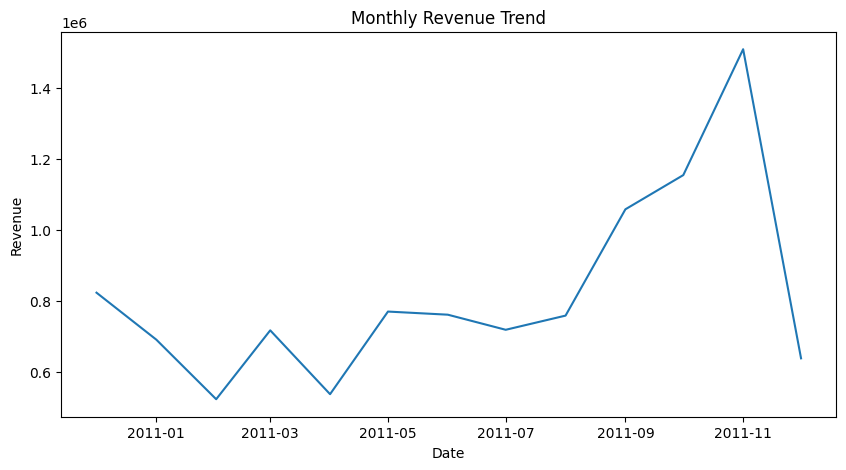

In [22]:
plt.figure(figsize=(10,5))
plt.plot(time_df.index, time_df["Monthly_Revenue"])
plt.title("Monthly Revenue Trend")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.show()


TRAIN–TEST SPLIT

In [23]:
train = time_df.iloc[:-6]
test = time_df.iloc[-6:]

BUILD FORECAST MODEL

In [26]:
time_df = pd.read_csv(
    r"D:\decision-intelligence-project\Data\Processed_Data\time_series_data.csv"
)

time_df["Date"] = pd.to_datetime(
    time_df["Year"].astype(str) + "-" + time_df["Month"].astype(str) + "-01"
)

time_df = time_df.set_index("Date")

# EXPLICITLY SET MONTHLY FREQUENCY
time_df = time_df.asfreq("MS")

train = time_df.iloc[:-6]
test = time_df.iloc[-6:]

from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(
    train["Monthly_Revenue"],
    order=(1,1,1),
    enforce_stationarity=False,
    enforce_invertibility=False
)

model_fit = model.fit(disp=False)

BASE CASE FORECAST

    Next 6 months

In [27]:
forecast = model_fit.get_forecast(steps=6)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

forecast_df = pd.DataFrame({
    "Base_Forecast": forecast_mean,
    "Lower_CI": forecast_ci.iloc[:, 0],
    "Upper_CI": forecast_ci.iloc[:, 1]
})

forecast_df

,Base_Forecast,Lower_CI,Upper_CI
2011-07-01,735969.970110,393240.409229,1.078700e+06
2011-08-01,738507.933895,179972.174243,1.297044e+06
2011-09-01,738257.981326,32877.666870,1.443638e+06
2011-10-01,738282.598024,-88775.027676,1.565340e+06
2011-11-01,738280.173636,-194673.231200,1.671234e+06
2011-12-01,738280.412403,-289721.622433,1.766282e+06


SCENARIO PLANNING

    Best Case → +10% demand
    Worst Case → −10% demand

In [32]:
forecast_df["Best_Case"] = forecast_df["Base_Forecast"] * 1.10
forecast_df["Worst_Case"] = forecast_df["Base_Forecast"] * 0.90

forecast_df

,Base_Forecast,Lower_CI,Upper_CI,Best_Case,Worst_Case
2011-07-01,735969.970110,393240.409229,1.078700e+06,809566.967121,662372.973099
2011-08-01,738507.933895,179972.174243,1.297044e+06,812358.727284,664657.140505
2011-09-01,738257.981326,32877.666870,1.443638e+06,812083.779459,664432.183193
2011-10-01,738282.598024,-88775.027676,1.565340e+06,812110.857826,664454.338221
2011-11-01,738280.173636,-194673.231200,1.671234e+06,812108.191000,664452.156273
2011-12-01,738280.412403,-289721.622433,1.766282e+06,812108.453644,664452.371163


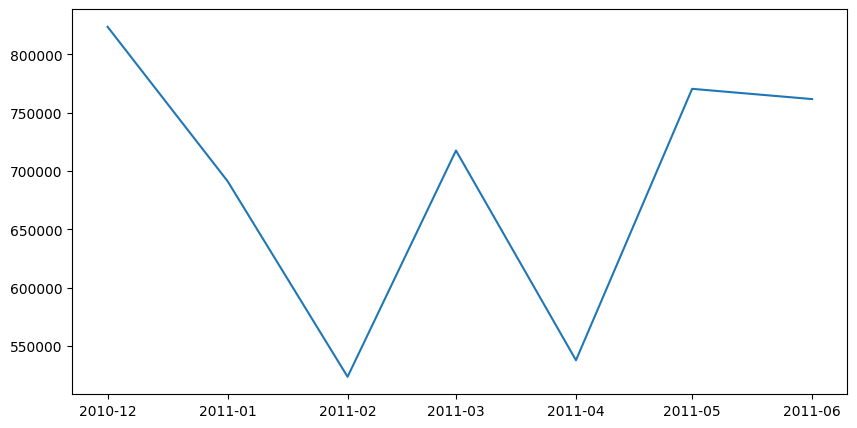

In [33]:
plt.figure(figsize=(10,5))
plt.plot(train.index, train["Monthly_Revenue"], label="Train")

VISUALIZE SCENARIOS

    CXO FRIENDLY

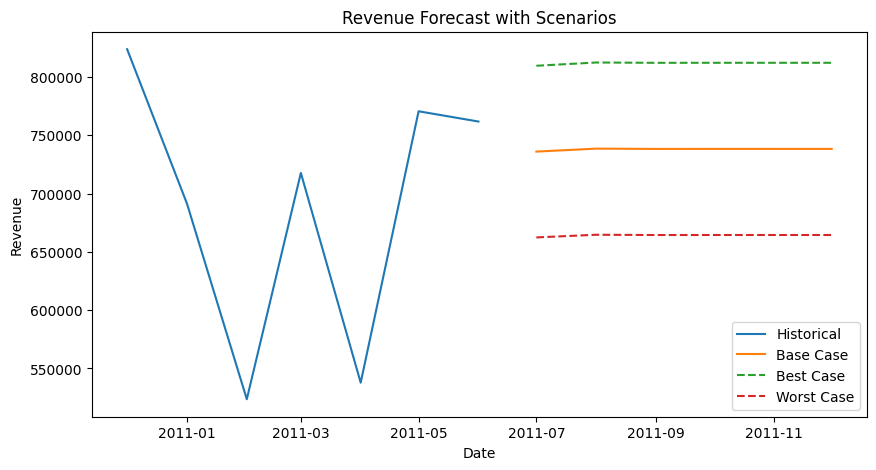

In [41]:
plt.figure(figsize=(10,5))

plt.plot(train.index, train["Monthly_Revenue"], label="Historical")
plt.plot(forecast_df.index, forecast_df["Base_Forecast"], label="Base Case")
plt.plot(forecast_df.index, forecast_df["Best_Case"], linestyle="--", label="Best Case")
plt.plot(forecast_df.index, forecast_df["Worst_Case"], linestyle="--", label="Worst Case")

plt.title("Revenue Forecast with Scenarios")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.legend()
plt.show()


In [42]:
forecast_df.to_csv(
    r"D:\decision-intelligence-project\Data\processed\revenue_forecast_scenarios.csv"
)
